## **Packages**

In [15]:
import nltk

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

#for deep learning approach
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout #use to regularization
from sklearn.model_selection import train_test_split
from collections import Counter

from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

#cleaning the text
#cleaning text is basically removing stop words, commas, full stops, lemmatizing or stemming it etc.
import re #for regular expression
from nltk.corpus import stopwords #responsible for removing stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer #responsible for doing lemmatizing

In [18]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Dataset Preprocessing**

In [19]:
data = pd.read_csv('updated_inkognito_trainingset.csv')

In [20]:
df = data.iloc[:1500, :]

In [21]:
df.head()

,Unnamed: 0,text,Status
0,0,@115712 I understand. I would like to assist y...,False
1,1,@sprintcare and how do you propose we do that,False
2,2,@sprintcare I have sent several private messag...,False
3,3,@115712 Please send us a Private Message so th...,False
4,4,@sprintcare I did.,False


In [22]:
df.drop('Unnamed: 0',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


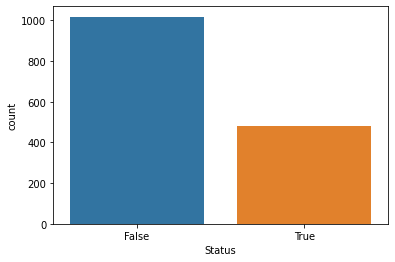

In [23]:
sns.countplot(x=df['Status']) #data distribution of response variable

In [24]:
df = pd.get_dummies(df, columns=['Status']) #to convert the categorical variable to numerical

In [25]:
df.drop('Status_False',axis=1,inplace=True)

In [26]:
df = df.rename(columns={'Status_True': 'Status'})

In [27]:
df.head()
# False -> 0
# True -> 1

,text,Status
0,@115712 I understand. I would like to assist y...,0
1,@sprintcare and how do you propose we do that,0
2,@sprintcare I have sent several private messag...,0
3,@115712 Please send us a Private Message so th...,0
4,@sprintcare I did.,0


### **Data cleaning for NLP Approach**

In [28]:
wordnet = WordNetLemmatizer() #this is responsible for doing the lemmatizing functionality
corpus = [] #after cleaning the text we are going to store perticular sentence in this list

In [29]:
for i in range(0,len(df)): #go through each row in dataset
    review = re.sub('[^a-zA-Z]',' ',df['text'][i]) #apart from a-z and A-Z we remove everything and replace them by spaces
    review = review.lower() #lower all the words then we don't have any duplicates
    review = review.split() #split each and every word to help to lemmatizing
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')] #lemmatzing and remove stop words
    #first find the word is stop word or not. if it is not a lemmatizing word , then move it to the- lemmatizing purpose.
    #from lemmatizing we can get base form of the word
    review = ' '.join(review) #join every lemmatized word
    corpus.append(review) #append to empty list


In [30]:
corpus

['understand would like assist would need get private secured link assist',
 'sprintcare propose',
 'sprintcare sent several private message one responding usual',
 'please send u private message assist click message top profile',
 'sprintcare',
 'please send u private message gain detail account',
 'sprintcare worst customer service',
 'saddening hear please shoot u dm look kc',
 'sprintcare gonna magically change connectivity whole family',
 'understand concern like please send u direct message assist aa',
 'sprintcare since signed since day',
 'h definitely like work long experiencing issue aa',
 'lie great connection bar lte still load something smh',
 'please send private message send link access account fr',
 'whenever contact customer support tell shortcode enabled account never year tried http co g rtnxpk',
 'information incorrect jk',
 'ask spectrum would like email copy one since spectrum updating training',
 'department part corporate office particular area gone format unawa

### **Word Embedding Model**

In [31]:
voc_size = len(corpus) + 1
onehot_repr = [one_hot(words,voc_size) for words in corpus] #one hot representation
print(onehot_repr)

[[1222, 1401, 139, 906, 1401, 515, 1326, 113, 232, 195, 906], [375, 228], [375, 628, 802, 113, 434, 950, 382, 1406], [815, 1456, 914, 113, 434, 906, 473, 434, 493, 337], [375], [815, 1456, 914, 113, 434, 677, 187, 881], [375, 1482, 294, 119], [1112, 202, 815, 687, 914, 1308, 1288, 174], [375, 1075, 586, 1385, 550, 140, 1473], [1222, 1063, 139, 815, 1456, 914, 75, 434, 906, 504], [375, 621, 938, 621, 1039], [832, 24, 139, 639, 914, 313, 1061, 504], [724, 335, 482, 267, 1078, 8, 149, 1492, 31], [815, 1456, 113, 434, 1456, 195, 324, 881, 951], [701, 222, 294, 713, 299, 684, 1107, 881, 833, 1400, 971, 194, 1196, 1295, 317], [911, 1153, 469], [344, 313, 1401, 139, 245, 505, 950, 621, 313, 1219, 474], [1405, 283, 889, 533, 1040, 1330, 411, 413, 868, 194, 1196, 884, 1397], [344, 313, 696, 889, 533, 1401, 139, 505], [1134, 469], [344, 313, 870, 761, 1128, 603, 881, 1109, 245, 409, 151, 515, 1260, 400, 533], [344, 313, 1153, 911, 151, 900, 1245, 648, 515, 372, 1392, 911], [911, 1057, 881, 1330,

In [32]:
voc_size

1501

In [33]:
sent_length = max([len(seq) for seq in onehot_repr])
# sent_length = 31
embedded_docs = pad_sequences(onehot_repr, padding='pre',maxlen=sent_length) #padding the sequence
print(embedded_docs)

[[   0    0    0 ...  232  195  906]
 [   0    0    0 ...    0  375  228]
 [   0    0    0 ...  950  382 1406]
 ...
 [   0    0    0 ...    8  633 1100]
 [   0    0    0 ... 1326 1439 1105]
 [   0    0    0 ...  476  842    8]]


In [34]:
sent_length

31

In [35]:
embedded_docs.shape
#number of words = 31
# number of sentences = 1500

(1500, 31)

In [36]:
# add the dimensions count / number of features for embedding
dim = 100

In [37]:
#split the dataset for trining and testing
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, df['Status'].values, test_size=1/3)
#training set size = 1000
#testing set size = 500

In [38]:
X_train.shape, y_train.shape

((1000, 31), (1000,))

In [39]:
X_test.shape, y_test.shape

((500, 31), (500,))

### **Handle class imbalance using SMOTE**

* Handle the training set



In [40]:
Counter(y_train) #y_train class counts

Counter({0: 668, 1: 332})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


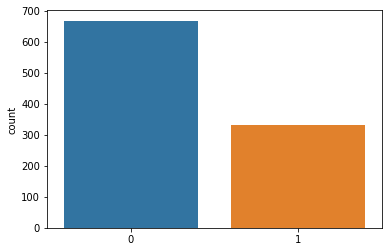

In [41]:
#class distribution of before handling the class imbalancing for training data
sns.countplot(y_train) 

In [42]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [43]:
X_train_sm.shape #44 sentence length
# 11646 senetences

(1336, 31)

In [44]:
Counter(y_train_sm)
#each class have 5823

Counter({0: 668, 1: 668})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


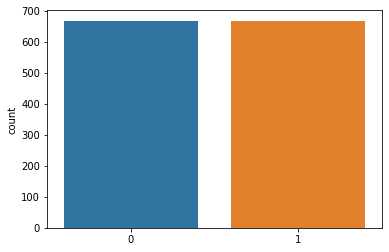

In [45]:
sns.countplot(y_train_sm) #class distribution after handling the imbalanced data for training data

In [46]:
#shape of the training data after handling the class imbalance
X_train_sm.shape, y_train_sm.shape

((1336, 31), (1336,))

* Handle the test data

In [47]:
Counter(y_test) #y_test class counts

Counter({0: 350, 1: 150})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


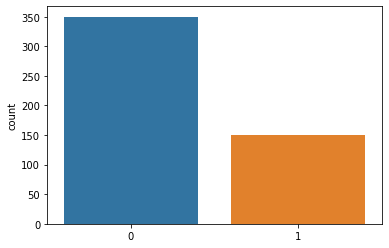

In [48]:
#class distribution of before handling the class imbalancing for training data
sns.countplot(y_test) 

In [49]:
smote = SMOTE()
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

In [50]:
X_test_sm.shape #44 swntence length
# 2984 senetences

(700, 31)

In [51]:
Counter(y_test_sm)
# each class have 1492

Counter({0: 350, 1: 350})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


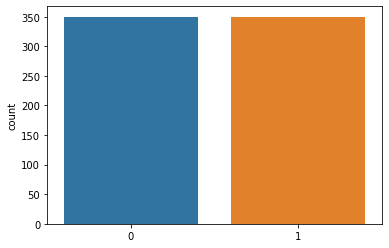

In [52]:
sns.countplot(y_test_sm) #class distribution after handling the imbalanced data for training data

In [53]:
#shape of the training data after handling the class imbalance
X_test_sm.shape, y_test_sm.shape

((700, 31), (700,))

### **Conv1D with Embedding Layer**

In [54]:
# define model
word_embedding = Sequential()
# 100 -> number of features / number of dimensions
word_embedding.add(Embedding(voc_size, dim, input_length=sent_length,name="embedding"))
# there are 32 kernels/ filters. each one size is (8*8)
word_embedding.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
word_embedding.add(Dropout(0.5))
word_embedding.add(MaxPooling1D(pool_size=2))
word_embedding.add(Flatten())

word_embedding.add(Dense(400, activation='sigmoid'))
word_embedding.add(Dropout(0.4))
word_embedding.add(Dense(200, activation='relu'))
word_embedding.add(Dropout(0.3))
word_embedding.add(Dense(100, activation='sigmoid'))
word_embedding.add(Dropout(0.2))
# there are 10 neurons in the dense layer
word_embedding.add(Dense(10, activation='relu'))
word_embedding.add(Dropout(0.1))
#there are one neuron in the last layer
word_embedding.add(Dense(1, activation='sigmoid'))
print(word_embedding.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           150100    
                                                                 
 conv1d (Conv1D)             (None, 24, 32)            25632     
                                                                 
 dropout (Dropout)           (None, 24, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 400)               154000    
                                                        

In [55]:
# compile network
word_embedding.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# fit network
#word_embedding_history = word_embedding.fit(X_smote, y_smote, epochs=20, verbose=2)
#fitting to the training set
word_embedding_history = word_embedding.fit(X_train_sm,y_train_sm,validation_split=0.25,epochs=50)

Epoch 1/50
32/32 [==============================] - 24s 312ms/step - loss: 0.6615 - accuracy: 0.6447 - val_loss: 0.9074 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 4s 115ms/step - loss: 0.6500 - accuracy: 0.6667 - val_loss: 0.9934 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 1s 47ms/step - loss: 0.6423 - accuracy: 0.6677 - val_loss: 1.2446 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 36ms/step - loss: 0.6327 - accuracy: 0.6667 - val_loss: 1.1506 - val_accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 1s 40ms/step - loss: 0.4996 - accuracy: 0.6806 - val_loss: 1.3980 - val_accuracy: 0.1228
Epoch 6/50
32/32 [==============================] - 1s 23ms/step - loss: 0.2793 - accuracy: 0.9042 - val_loss: 2.7176 - val_accuracy: 0.1916
Epoch 7/50
32/32 [==============================] - 1s 27ms/step - loss: 0.1581 - accuracy: 0.9521 - val_loss: 2.2400 - val_accuracy: 0

* Evaluating the model

In [58]:
#Predicting the test set result
y_pred = word_embedding.predict(X_test_sm)
y_pred = (y_pred > 0.5)

22/22 [==============================] - 0s 3ms/step


In [59]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[292,  58],
       [189, 161]])

Text(33.0, 0.5, 'Truth')

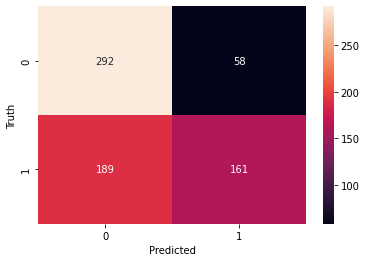

In [60]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70       350
           1       0.74      0.46      0.57       350

    accuracy                           0.65       700
   macro avg       0.67      0.65      0.63       700
weighted avg       0.67      0.65      0.63       700



### **LSTM with Word Embedding Layer**

In [62]:
# define model
lstm = Sequential()
# 100 -> number of features / number of dimensions
lstm.add(Embedding(voc_size, dim, input_length=sent_length,name="embedding"))
lstm.add(LSTM(sent_length)) #44 gated cells inside the lstm layer
lstm.add(Flatten())
# fit network
lstm.add(Dense(1000, activation='sigmoid')) 
lstm.add(Dropout(0.5))
lstm.add(Dense(200, activation='sigmoid'))
lstm.add(Dropout(0.3))
lstm.add(Dense(100, activation='sigmoid'))
lstm.add(Dropout(0.2))
#there are one neuron in the last layer
lstm.add(Dense(1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           150100    
                                                                 
 lstm (LSTM)                 (None, 31)                16368     
                                                                 
 flatten_1 (Flatten)         (None, 31)                0         
                                                                 
 dense_5 (Dense)             (None, 1000)              32000     
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               200200    
                                                                 
 dropout_6 (Dropout)         (None, 200)              

In [63]:
# compile network
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# fit network
#lstm.fit(embedded_docs, response, epochs=10, verbose=2)
lstm_history = lstm.fit(X_train_sm,y_train_sm,validation_split=0.25,epochs=50)

Epoch 1/50
32/32 [==============================] - 7s 90ms/step - loss: 0.6486 - accuracy: 0.6607 - val_loss: 0.7598 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 3s 90ms/step - loss: 0.6622 - accuracy: 0.6277 - val_loss: 1.1790 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 2s 50ms/step - loss: 0.6330 - accuracy: 0.6657 - val_loss: 1.1303 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 34ms/step - loss: 0.4267 - accuracy: 0.8134 - val_loss: 1.3352 - val_accuracy: 0.3982
Epoch 5/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2060 - accuracy: 0.9251 - val_loss: 2.6144 - val_accuracy: 0.2575
Epoch 6/50
32/32 [==============================] - 1s 16ms/step - loss: 0.1293 - accuracy: 0.9631 - val_loss: 2.2592 - val_accuracy: 0.3982
Epoch 7/50
32/32 [==============================] - 1s 27ms/step - loss: 0.0597 - accuracy: 0.9840 - val_loss: 2.5245 - val_accuracy: 0.4162
E

* Evaluating the model

In [66]:
#Predicting the test set result
y_pred = lstm.predict(X_test_sm)
y_pred = (y_pred > 0.5)

22/22 [==============================] - 1s 3ms/step


In [67]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[294,  56],
       [191, 159]])

Text(33.0, 0.5, 'Truth')

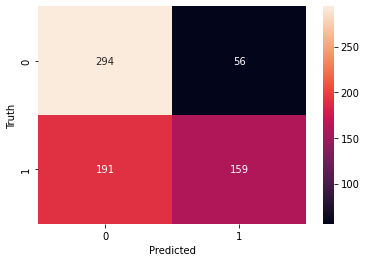

In [68]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.84      0.70       350
           1       0.74      0.45      0.56       350

    accuracy                           0.65       700
   macro avg       0.67      0.65      0.63       700
weighted avg       0.67      0.65      0.63       700



### **Bidirectional LSTM with Word Embedding Layer**

In [70]:
# define model
bilstm = Sequential()
# 100 -> number of features / number of dimensions
bilstm.add(Embedding(voc_size, dim, input_length=sent_length,name="embedding"))
bilstm.add(Bidirectional(LSTM(sent_length))) # there are 44*2 gated cells inside the layer
bilstm.add(Flatten())
bilstm.add(Dense(40, activation='sigmoid'))
bilstm.add(Dropout(0.3))
#bilstm.add(Dense(1000, activation='sigmoid'))
#bilstm.add(Dropout(0.2))
#bilstm.add(Dense(100, activation='sigmoid'))
#bilstm.add(Dropout(0.3))
#bilstm.add(Dense(10, activation='sigmoid'))
#bilstm.add(Dropout(0.2))
#there are one neuron in the last layer
bilstm.add(Dense(1, activation='sigmoid'))
print(bilstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           150100    
                                                                 
 bidirectional (Bidirectiona  (None, 62)               32736     
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 62)                0         
                                                                 
 dense_9 (Dense)             (None, 40)                2520      
                                                                 
 dropout_8 (Dropout)         (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                      

In [71]:
# compile network
bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# fit network
#lstm.fit(embedded_docs, response, epochs=10, verbose=2)
bilstm_history = bilstm.fit(X_train_sm,y_train_sm,validation_split=0.25,epochs=50)

Epoch 1/50
32/32 [==============================] - 9s 142ms/step - loss: 0.7098 - accuracy: 0.5449 - val_loss: 1.4340 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 4s 129ms/step - loss: 0.6438 - accuracy: 0.6537 - val_loss: 1.0628 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 1s 30ms/step - loss: 0.5854 - accuracy: 0.6846 - val_loss: 1.1930 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 32ms/step - loss: 0.4306 - accuracy: 0.8114 - val_loss: 1.2683 - val_accuracy: 0.2725
Epoch 5/50
32/32 [==============================] - 1s 23ms/step - loss: 0.2855 - accuracy: 0.9062 - val_loss: 1.7445 - val_accuracy: 0.2156
Epoch 6/50
32/32 [==============================] - 1s 23ms/step - loss: 0.1953 - accuracy: 0.9471 - val_loss: 1.7132 - val_accuracy: 0.3054
Epoch 7/50
32/32 [==============================] - 1s 34ms/step - loss: 0.1286 - accuracy: 0.9711 - val_loss: 1.7656 - val_accuracy: 0.3443

In [74]:
#Predicting the test set result
y_pred = bilstm.predict(X_test_sm)
y_pred = (y_pred > 0.5)

22/22 [==============================] - 1s 3ms/step


In [75]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[297,  53],
       [212, 138]])

Text(33.0, 0.5, 'Truth')

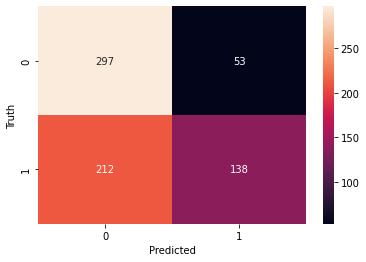

In [76]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69       350
           1       0.72      0.39      0.51       350

    accuracy                           0.62       700
   macro avg       0.65      0.62      0.60       700
weighted avg       0.65      0.62      0.60       700



In [78]:
bilstm.evaluate(X_test_sm,y_test_sm)

22/22 [==============================] - 0s 4ms/step - loss: 2.3065 - accuracy: 0.6214


[2.3065261840820312, 0.6214285492897034]

### **FFNN with Word Embedding Layer**

In [79]:
ffnn = Sequential()
ffnn.add(Embedding(voc_size, dim, input_length=sent_length,name="embedding"))
ffnn.add(Flatten())
ffnn.add(Dense(2000, activation='sigmoid'))
ffnn.add(Dropout(0.3))
ffnn.add(Dense(500, activation='sigmoid'))
ffnn.add(Dropout(0.2))
ffnn.add(Dense(10, activation='sigmoid'))
ffnn.add(Dropout(0.1))
ffnn.add(Dense(1, activation='sigmoid'))
print(ffnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           150100    
                                                                 
 flatten_3 (Flatten)         (None, 3100)              0         
                                                                 
 dense_11 (Dense)            (None, 2000)              6202000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               1000500   
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [80]:
# compile network
ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
# fit network
#lstm.fit(embedded_docs, response, epochs=10, verbose=2)
ffnn_history = ffnn.fit(X_train_sm,y_train_sm,validation_split=0.25,epochs=50)

Epoch 1/50
32/32 [==============================] - 5s 89ms/step - loss: 0.6497 - accuracy: 0.6607 - val_loss: 0.9915 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 2s 67ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 1.0771 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 1s 36ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 1.1181 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 32ms/step - loss: 0.6385 - accuracy: 0.6667 - val_loss: 1.0754 - val_accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 1s 23ms/step - loss: 0.6399 - accuracy: 0.6667 - val_loss: 1.0704 - val_accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 1s 24ms/step - loss: 0.6112 - accuracy: 0.6667 - val_loss: 1.2411 - val_accuracy: 0.0000e+00
Epoch 7/50
32/32 [==============================] - 1s 26ms/step - loss: 0.4641 - accuracy: 0.7645 - val_loss: 1.2955 - val_accura

In [83]:
#Predicting the test set result
y_pred = ffnn.predict(X_test_sm)
y_pred = (y_pred > 0.5)

22/22 [==============================] - 0s 2ms/step


In [84]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[322,  28],
       [213, 137]])

Text(33.0, 0.5, 'Truth')

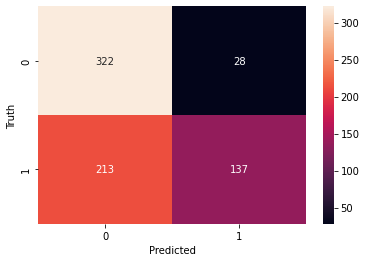

In [85]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.92      0.73       350
           1       0.83      0.39      0.53       350

    accuracy                           0.66       700
   macro avg       0.72      0.66      0.63       700
weighted avg       0.72      0.66      0.63       700

